# $100,000 Investment Project

gets the values of 

In [78]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import statsmodels.api as sm

In [79]:
# stock tickers
tickers = ["TCEHY", "HAS", "BBWI", "NWL", "NFLX", "^GSPC"]  # ^GSPC represents the S&P 500

start_date = "2025-01-10"

In [80]:
# Calculate last Friday's date
today = datetime.today()
last_friday = today - timedelta(days=today.weekday() + 3)

In [81]:
# Fetch the data
data = {}

In [82]:
# set number of shares for each stock
shares = {
    "TCEHY": 300,
    "HAS": 400,
    "BBWI": 500,
    "NWL": 6100,
    "NFLX": 20,
}

In [83]:
# Fetch data for each ticker
for ticker in tickers:
    try:
        stock_data = yf.download(
            ticker,
            start=start_date,
            end=last_friday.strftime('%Y-%m-%d'),
            interval="1wk"
        )
        if not stock_data.empty:
            data[ticker] = stock_data['Close']
            data[f"{ticker} value"] = stock_data['Close'] * shares[ticker]
        else:
            print(f"No data returned for {ticker}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Error fetching data for ^GSPC: '^GSPC'


In [84]:
print(data)

{'TCEHY': Ticker          TCEHY
Date                 
2025-01-06  46.840000
2025-01-13  49.340000
2025-01-20  50.349998
2025-01-27  53.020000
2025-02-03  54.959999
2025-02-10  61.529999
2025-02-17  66.709999
2025-02-24  61.610001
2025-03-03  68.220001
2025-03-10  68.050003
2025-03-17  65.720001
2025-03-24  65.050003, 'TCEHY value': Ticker             TCEHY
Date                    
2025-01-06  14052.000046
2025-01-13  14802.000046
2025-01-20  15104.999542
2025-01-27  15906.000137
2025-02-03  16487.999725
2025-02-10  18458.999634
2025-02-17  20012.999725
2025-02-24  18483.000183
2025-03-03  20466.000366
2025-03-10  20415.000916
2025-03-17  19716.000366
2025-03-24  19515.000916, 'HAS': Ticker            HAS
Date                 
2025-01-06  56.426762
2025-01-13  56.723537
2025-01-20  56.802677
2025-01-27  57.218163
2025-02-03  58.415154
2025-02-10  60.166122
2025-02-17  66.833656
2025-02-24  64.410004
2025-03-03  63.658173
2025-03-10  59.790001
2025-03-17  60.570000
2025-03-24  60.590000,

In [85]:
# Combine into a single DataFrame
df = pd.concat(data, axis=1)

In [86]:
for ticker in tickers:
    if f"{ticker} value" in df.columns:
        # Calculate percentage change from the first value
        df[f"{ticker} Percent Change"] = (df[f"{ticker} value"] - df[f"{ticker} value"].iloc[0]) / df[f"{ticker} value"].iloc[0] * 100

In [87]:
df.to_csv("100k_Project_weekly.csv")

In [88]:
df

,TCEHY,TCEHY value,HAS,HAS value,BBWI,BBWI value,NWL,NWL value,NFLX,NFLX value,^GSPC,TCEHY Percent Change,HAS Percent Change,BBWI Percent Change,NWL Percent Change,NFLX Percent Change
Ticker,TCEHY,TCEHY,HAS,HAS,BBWI,BBWI,NWL,NWL,NFLX,NFLX,^GSPC,,,,,
Date,,,,,,,,,,,,,,,,
2025-01-06,46.840000,14052.000046,56.426762,22570.704651,36.229485,18114.742279,9.652747,58881.757641,837.690002,16753.800049,5827.040039,0.000000,0.000000,0.000000,0.000000,0.000000
2025-01-13,49.340000,14802.000046,56.723537,22689.414978,36.567799,18283.899307,10.008791,61053.624916,858.099976,17161.999512,5996.660156,5.337319,0.525949,0.933809,3.688523,2.436459
2025-01-20,50.349998,15104.999542,56.802677,22721.070862,36.806610,18403.305054,10.542857,64311.428738,977.590027,19551.800537,6101.240234,7.493592,0.666201,1.592972,9.221313,16.700692
2025-01-27,53.020000,15906.000137,57.218163,22887.265015,37.423534,18711.767197,9.850550,60088.353157,976.760010,19535.200195,6040.529785,13.193852,1.402528,3.295796,2.049184,16.601608
2025-02-03,54.959999,16487.999725,58.415154,23366.061401,35.712063,17856.031418,7.051649,43015.056562,1013.929993,20278.599854,6025.990234,17.335608,3.523845,-1.428179,-26.946718,21.038808
2025-02-10,61.529999,18458.999634,60.166122,24066.448975,36.289188,18144.594193,6.982418,42592.747259,1058.599976,21171.999512,6114.629883,31.362081,6.626928,0.164793,-27.663934,26.371327
2025-02-17,66.709999,20012.999725,66.833656,26733.462524,38.398678,19199.338913,6.725275,41024.177742,1003.150024,20063.000488,6013.129883,42.421005,18.443190,5.987370,-30.327865,19.751939
2025-02-24,61.610001,18483.000183,64.410004,25764.001465,36.230000,18114.999771,6.349451,38731.648588,980.559998,19611.199951,5954.500000,31.532879,14.147971,0.001421,-34.221310,17.055235


In [89]:
# graph TCEHY over time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker


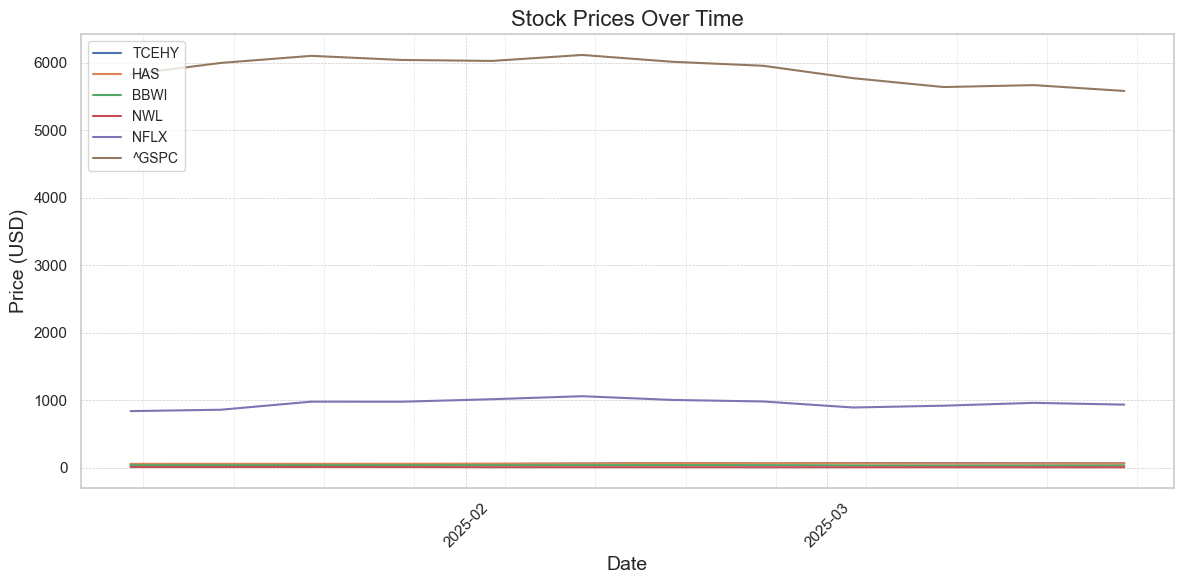

In [90]:

# Set the style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
for ticker in tickers:
    if ticker in df.columns:
        ax.plot(df.index, df[ticker], label=ticker)

# Set the title and labels
ax.set_title('Stock Prices Over Time', fontsize=16)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price (USD)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

# Add gridlines
ax.grid(which='both', linestyle='--', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5)

# Add a legend

ax.legend(tickers, loc='upper left', fontsize=10)
ax.legend(loc='upper left', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [91]:
# graph just TCEHY over time
def plot_ticker(ticker):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(df.index, df[ticker], label=ticker, color='blue')

    ax.set_title(f'{ticker} Closing Prices Over Time', fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Price (USD)', fontsize=14)
    plt.xticks(rotation=45)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

    ax.grid(which='both', linestyle='--', linewidth=0.5)

    ax.grid(which='minor', linestyle=':', linewidth=0.5)

    ax.legend([ticker], loc='upper left', fontsize=10)
    ax.legend(loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.show()

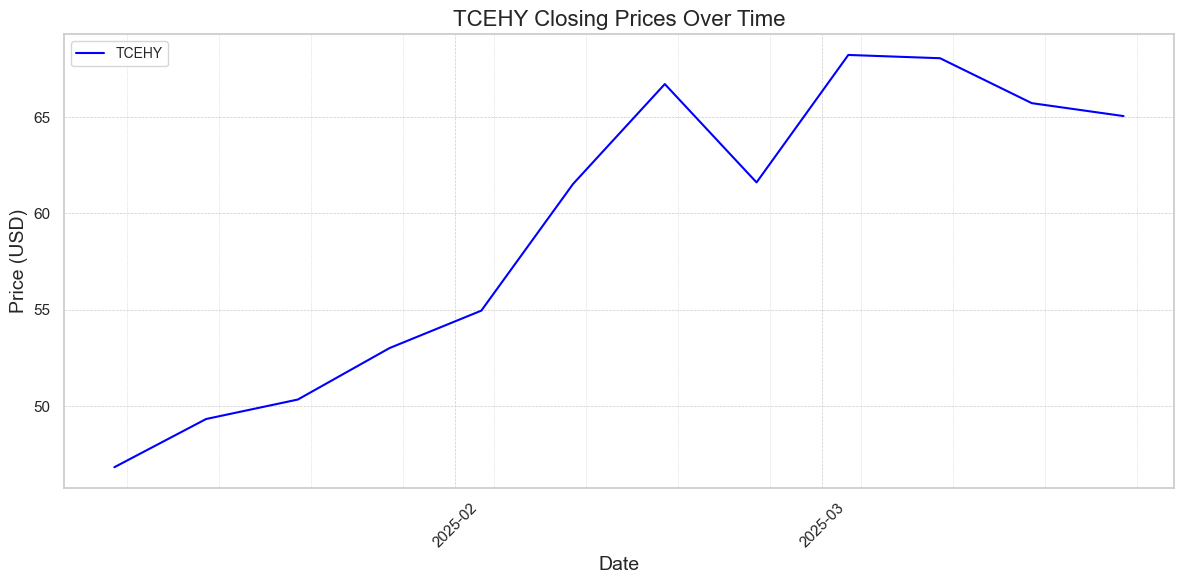

In [92]:
plot_ticker("TCEHY")

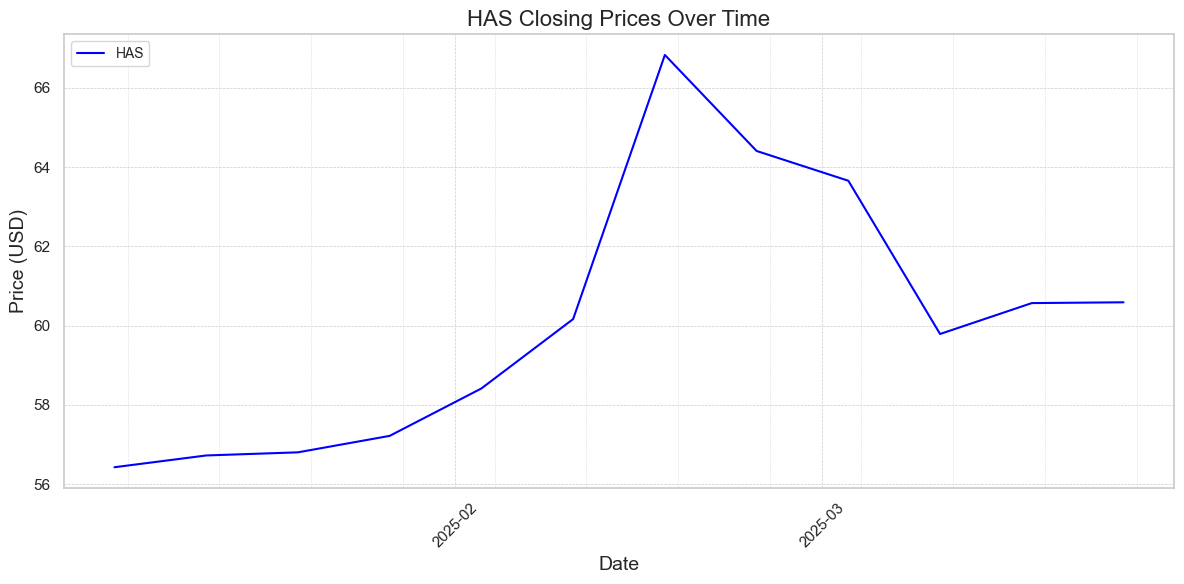

In [93]:
plot_ticker("HAS")

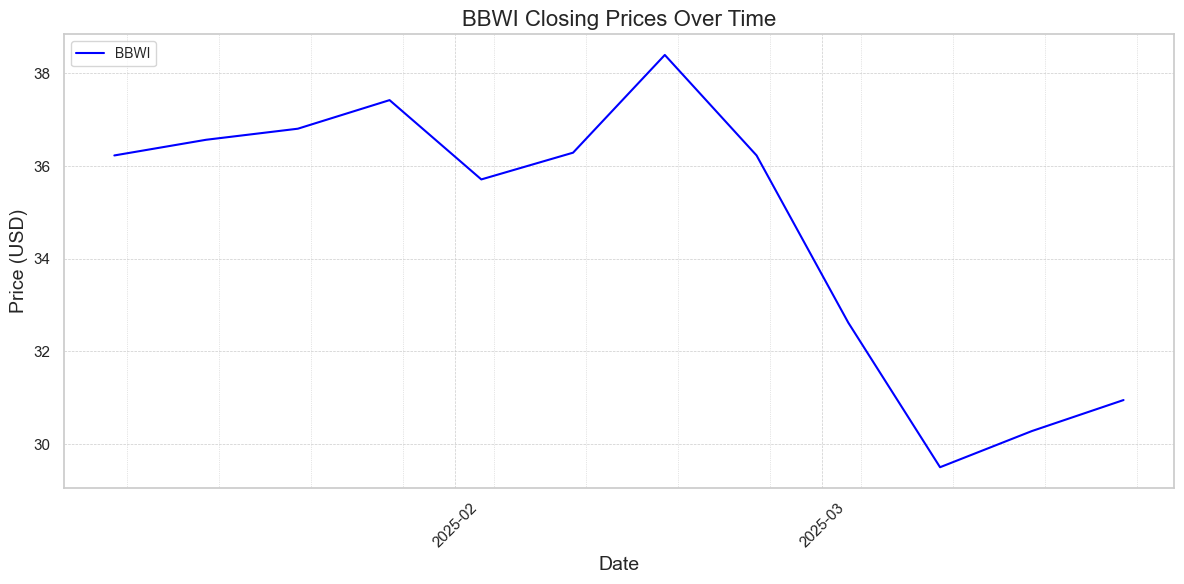

In [94]:
plot_ticker("BBWI")

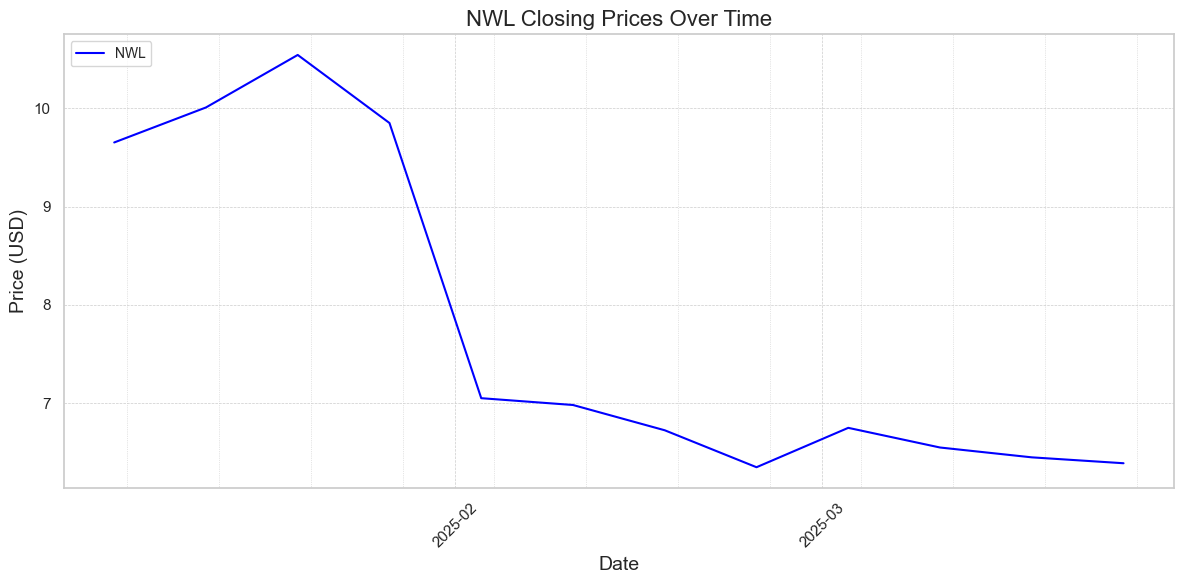

In [95]:
plot_ticker("NWL")

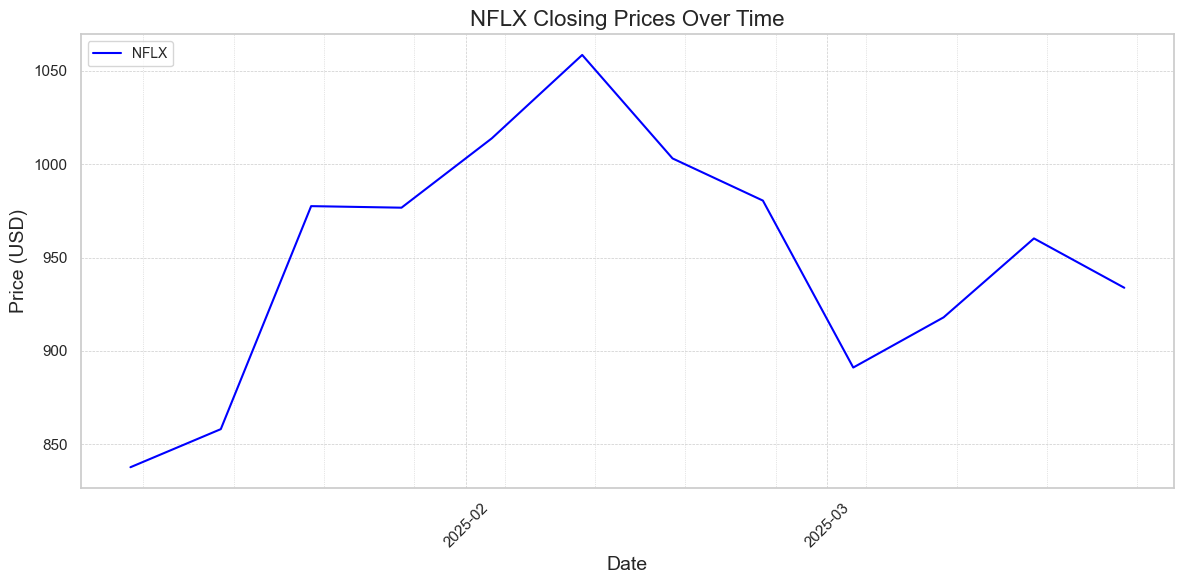

In [96]:
plot_ticker("NFLX")

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assume df is your DataFrame containing weekly data for your stocks and the market (^GSPC).

# Define the number of shares for each stock
shares = {
    "TCEHY": 300,
    "HAS": 400,
    "BBWI": 500,
    "NWL": 6100,
    "NFLX": 20,
}

# Compute each stock's value as a Series and combine them
stock_series = [df[stock] * shares[stock] for stock in shares]
# Use pd.concat to combine the Series into a DataFrame and then sum row-wise
df["Portfolio Value"] = pd.concat(stock_series, axis=1).sum(axis=1)

# Calculate weekly portfolio returns
df["Portfolio Return"] = df["Portfolio Value"].pct_change()
  
# Drop NaN values from pct_change()
df.dropna(inplace=True)

# Define market returns (assumed to be the percent change of ^GSPC)
market_returns = df["^GSPC"]

# Prepare regression variables
X = sm.add_constant(market_returns)
y = df["Portfolio Return"]

# Run the regression to compute beta
model = sm.OLS(y, X).fit()
portfolio_beta = model.params["^GSPC"]

print(f"Portfolio Beta: {portfolio_beta}")


Portfolio Beta: 2.3437173872192237e-05


Available weeks: 0
Try adjusting your date range to include more data


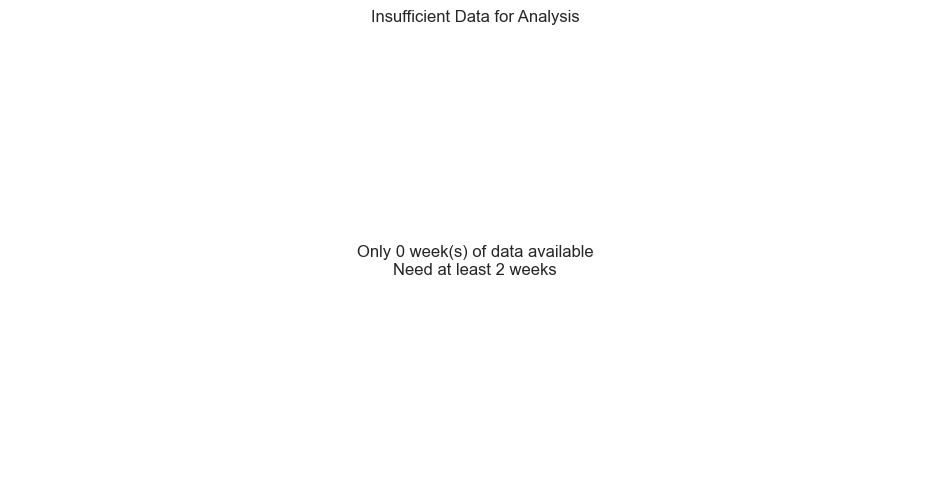

ValueError: zero-size array to reduction operation maximum which has no identity

: 

In [ ]:
# Calculate different ways the portfolio may have beaten the market

# --- Safeguard column creation ---
# Reconstruct portfolio value from components (in case of missing columns)
value_columns = [f"{ticker} value" for ticker in shares.keys() if f"{ticker} value" in df.columns]
if not value_columns:
    raise ValueError("No portfolio value columns found in DataFrame")

df["Portfolio Value"] = df[value_columns].sum(axis=1)

# Calculate returns AFTER ensuring portfolio value exists
df["Portfolio Return"] = df["Portfolio Value"].pct_change()
if '^GSPC' not in df.columns:
    raise ValueError("S&P 500 data (^GSPC) not found in DataFrame")
df['Market Return'] = df['^GSPC'].pct_change()

# --- Safe NaN handling ---
# Create temporary dataframe to avoid inplace operations
required_columns = ['Portfolio Value', '^GSPC', 'Portfolio Return', 'Market Return']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

analysis_df = df[required_columns].copy().dropna()

# Handle insufficient data gracefully
if len(analysis_df) < 2:
    print("Warning: Insufficient data points after cleaning (need at least 2 weeks)")
    print(f"Available weeks: {len(analysis_df)}")
    print("Try adjusting your date range to include more data")
    
    # Create empty plot to maintain notebook flow
    plt.figure(figsize=(12, 6))
    plt.title('Insufficient Data for Analysis')
    plt.text(0.5, 0.5, 
             f"Only {len(analysis_df)} week(s) of data available\nNeed at least 2 weeks", 
             ha='center', va='center')
    plt.axis('off')
    plt.show()
    
    # Exit the analysis early
    exit()

# --- Recalculate metrics with clean data ---
X = sm.add_constant(analysis_df['Market Return'])
y = analysis_df['Portfolio Return']
corrected_model = sm.OLS(y, X).fit()

# --- Calculations using SAFE INDEXING ---
cumulative_portfolio = ((analysis_df['Portfolio Value'].iloc[-1]/analysis_df['Portfolio Value'].iloc[0]) - 1) * 100
cumulative_market = ((analysis_df['^GSPC'].iloc[-1]/analysis_df['^GSPC'].iloc[0]) - 1) * 100

# --- Sharpe Ratio with valid data ---
sharpe_portfolio = (analysis_df['Portfolio Return'].mean() / analysis_df['Portfolio Return'].std()) * np.sqrt(52)
sharpe_market = (analysis_df['Market Return'].mean() / analysis_df['Market Return'].std()) * np.sqrt(52)

# --- Visualization with clean data ---
plt.figure(figsize=(12, 6))
plt.plot((1 + analysis_df['Portfolio Return']).cumprod() - 1, label='Portfolio')
plt.plot((1 + analysis_df['Market Return']).cumprod() - 1, label='S&P 500')
plt.title('Portfolio vs. Market Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth (1 = 100%)')
plt.legend()
plt.grid(True)
plt.show()

# --- Final output ---
print("Market Outperformance Analysis:")
print(f"1. Cumulative Returns:")
print(f"   Portfolio: {cumulative_portfolio:.2f}%")
print(f"   S&P 500:   {cumulative_market:.2f}%")
print(f"\n2. Risk-Adjusted Returns (Sharpe Ratio):")
print(f"   Portfolio: {sharpe_portfolio:.2f}")
print(f"   S&P 500:   {sharpe_market:.2f}")
print(f"\n3. CAPM Alpha: {corrected_model.params['const']*100:.2f}% (annualized)")
print(f"   Portfolio Beta: {corrected_model.params['Market Return']:.2f}")
outperform_percent = (analysis_df['Portfolio Return'] > analysis_df['Market Return']).mean() * 100
print(f"\n4. Weekly Outperformance: {outperform_percent:.1f}% of weeks ({int(len(analysis_df) * outperform_percent/100)}/{len(analysis_df)} weeks)")